# Combined Assignment for ML algorithm

## Assignemnt 1 
In  this  assignment,  students  will  be  using  the  K-nearest  neighbors 
algorithm to predict how many points NBA players scored in the 2013-2014 
season.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error 
from math import sqrt
from sklearn.preprocessing import StandardScaler 
%matplotlib inline

In [2]:
nba = pd.read_csv('nba_2013.csv')
nba

,player,pos,age,bref_team_id,g,gs,mp,fg,fga,fg.,...,drb,trb,ast,stl,blk,tov,pf,pts,season,season_end
0,Quincy Acy,SF,23,TOT,63,0,847,66,141,0.468,...,144,216,28,23,26,30,122,171,2013-2014,2013
1,Steven Adams,C,20,OKC,81,20,1197,93,185,0.503,...,190,332,43,40,57,71,203,265,2013-2014,2013
2,Jeff Adrien,PF,27,TOT,53,12,961,143,275,0.520,...,204,306,38,24,36,39,108,362,2013-2014,2013
3,Arron Afflalo,SG,28,ORL,73,73,2552,464,1011,0.459,...,230,262,248,35,3,146,136,1330,2013-2014,2013
4,Alexis Ajinca,C,25,NOP,56,30,951,136,249,0.546,...,183,277,40,23,46,63,187,328,2013-2014,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,Tony Wroten,SG,20,PHI,72,16,1765,345,808,0.427,...,159,228,217,78,16,204,151,939,2013-2014,2013
477,Nick Young,SG,28,LAL,64,9,1810,387,889,0.435,...,137,166,95,46,12,95,156,1144,2013-2014,2013
478,Thaddeus Young,PF,25,PHI,79,78,2718,582,1283,0.454,...,310,476,182,167,36,165,213,1417,2013-2014,2013
479,Cody Zeller,C,21,CHA,82,3,1416,172,404,0.426,...,235,353,92,40,41,87,170,490,2013-2014,2013


In [3]:
nba.shape

(481, 31)

In [4]:
nba.columns

Index(['player', 'pos', 'age', 'bref_team_id', 'g', 'gs', 'mp', 'fg', 'fga',
       'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft',
       'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf',
       'pts', 'season', 'season_end'],
      dtype='object')

In [5]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 481 entries, 0 to 480
Data columns (total 31 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   player        481 non-null    object 
 1   pos           481 non-null    object 
 2   age           481 non-null    int64  
 3   bref_team_id  481 non-null    object 
 4   g             481 non-null    int64  
 5   gs            481 non-null    int64  
 6   mp            481 non-null    int64  
 7   fg            481 non-null    int64  
 8   fga           481 non-null    int64  
 9   fg.           479 non-null    float64
 10  x3p           481 non-null    int64  
 11  x3pa          481 non-null    int64  
 12  x3p.          414 non-null    float64
 13  x2p           481 non-null    int64  
 14  x2pa          481 non-null    int64  
 15  x2p.          478 non-null    float64
 16  efg.          479 non-null    float64
 17  ft            481 non-null    int64  
 18  fta           481 non-null    

In [6]:
nba.isna().sum()

player           0
pos              0
age              0
bref_team_id     0
g                0
gs               0
mp               0
fg               0
fga              0
fg.              2
x3p              0
x3pa             0
x3p.            67
x2p              0
x2pa             0
x2p.             3
efg.             2
ft               0
fta              0
ft.             20
orb              0
drb              0
trb              0
ast              0
stl              0
blk              0
tov              0
pf               0
pts              0
season           0
season_end       0
dtype: int64

In [7]:
pd.set_option('display.max_columns', 100)
nba.describe()

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pts,season_end
count,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,479.000000,481.000000,481.000000,414.000000,481.000000,481.000000,478.000000,479.000000,481.000000,481.000000,461.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.000000,481.0
mean,26.509356,53.253638,25.571726,1237.386694,192.881497,424.463617,0.436436,39.613306,110.130977,0.285111,153.268191,314.332640,0.466947,0.480752,91.205821,120.642412,0.722419,55.810811,162.817048,218.627859,112.536383,39.280665,24.103950,71.862786,105.869023,516.582121,2013.0
std,4.198265,25.322711,29.658465,897.258840,171.832793,368.850833,0.098672,50.855639,132.751732,0.157633,147.223161,294.174554,0.104448,0.099552,103.667725,131.240639,0.160166,62.101191,145.348116,200.356507,131.019557,34.783590,30.875381,62.701690,71.213627,470.422228,0.0
min,19.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2013.0
25%,23.000000,32.000000,0.000000,388.000000,47.000000,110.000000,0.400500,0.000000,3.000000,0.234355,31.000000,67.000000,0.434719,0.451000,16.000000,22.000000,0.654000,12.000000,43.000000,55.000000,20.000000,9.000000,4.000000,21.000000,44.000000,115.000000,2013.0
50%,26.000000,61.000000,10.000000,1141.000000,146.000000,332.000000,0.438000,16.000000,48.000000,0.330976,110.000000,227.000000,0.474475,0.488000,53.000000,73.000000,0.751000,35.000000,135.000000,168.000000,65.000000,32.000000,14.000000,58.000000,104.000000,401.000000,2013.0
75%,29.000000,76.000000,54.000000,2016.000000,307.000000,672.000000,0.479500,68.000000,193.000000,0.375000,230.000000,459.000000,0.513729,0.526000,126.000000,179.000000,0.821000,73.000000,230.000000,310.000000,152.000000,60.000000,32.000000,108.000000,158.000000,821.000000,2013.0
max,39.000000,83.000000,82.000000,3122.000000,849.000000,1688.000000,1.000000,261.000000,615.000000,1.000000,706.000000,1408.000000,1.000000,1.000000,703.000000,805.000000,1.000000,440.000000,783.000000,1114.000000,721.000000,191.000000,219.000000,295.000000,273.000000,2593.000000,2013.0


In [8]:
nba.describe(include='object')

,player,pos,bref_team_id,season
count,481,481,481,481
unique,481,7,31,1
top,Boris Diaw,SG,TOT,2013-2014
freq,1,109,63,481


In [9]:
nba_n = nba.drop(columns=['player','season','season_end','bref_team_id'])

In [10]:
x3p_miss = np.where(nba_n['x3p.'].isna())
print('Total missing values in x3p. column is {}'.format(len(x3p_miss[0])))
x3p_mean = np.mean(nba_n['x3p.'])
x3p_sig = sqrt(np.var(nba_n['x3p.']))

ft_miss = np.where(nba_n['ft.'].isna())
print('Total missing values in x3p. column is {}'.format(len(ft_miss[0])))
ft_mean = np.mean(nba_n['ft.'])
ft_sig = sqrt(np.var(nba_n['ft.']))

Total missing values in x3p. column is 67
Total missing values in x3p. column is 20


In [11]:
import random
for i in x3p_miss[0]:
    nba_n['x3p.'].iloc[i] = random.uniform(x3p_mean - x3p_sig , x3p_mean + x3p_sig )
for i in ft_miss[0]:
    nba_n['ft.'].iloc[i] = random.uniform(ft_mean - ft_sig , ft_mean + ft_sig )

C:\Users\Admin\Anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [12]:
nba_n = nba_n.dropna(axis=0)
nba_n.reset_index(inplace = True)
nba_n = nba_n.drop(['index'],axis=1)
nba_n.isna().sum()

pos     0
age     0
g       0
gs      0
mp      0
fg      0
fga     0
fg.     0
x3p     0
x3pa    0
x3p.    0
x2p     0
x2pa    0
x2p.    0
efg.    0
ft      0
fta     0
ft.     0
orb     0
drb     0
trb     0
ast     0
stl     0
blk     0
tov     0
pf      0
pts     0
dtype: int64

In [13]:
obj_col = [i for i in nba_n.columns if nba_n[i].dtype =='object']
num_col = [i for i in nba_n.columns if i not in obj_col]
print(obj_col)
print()
print(num_col)
print()
print(len(num_col))

['pos']

['age', 'g', 'gs', 'mp', 'fg', 'fga', 'fg.', 'x3p', 'x3pa', 'x3p.', 'x2p', 'x2pa', 'x2p.', 'efg.', 'ft', 'fta', 'ft.', 'orb', 'drb', 'trb', 'ast', 'stl', 'blk', 'tov', 'pf', 'pts']

26


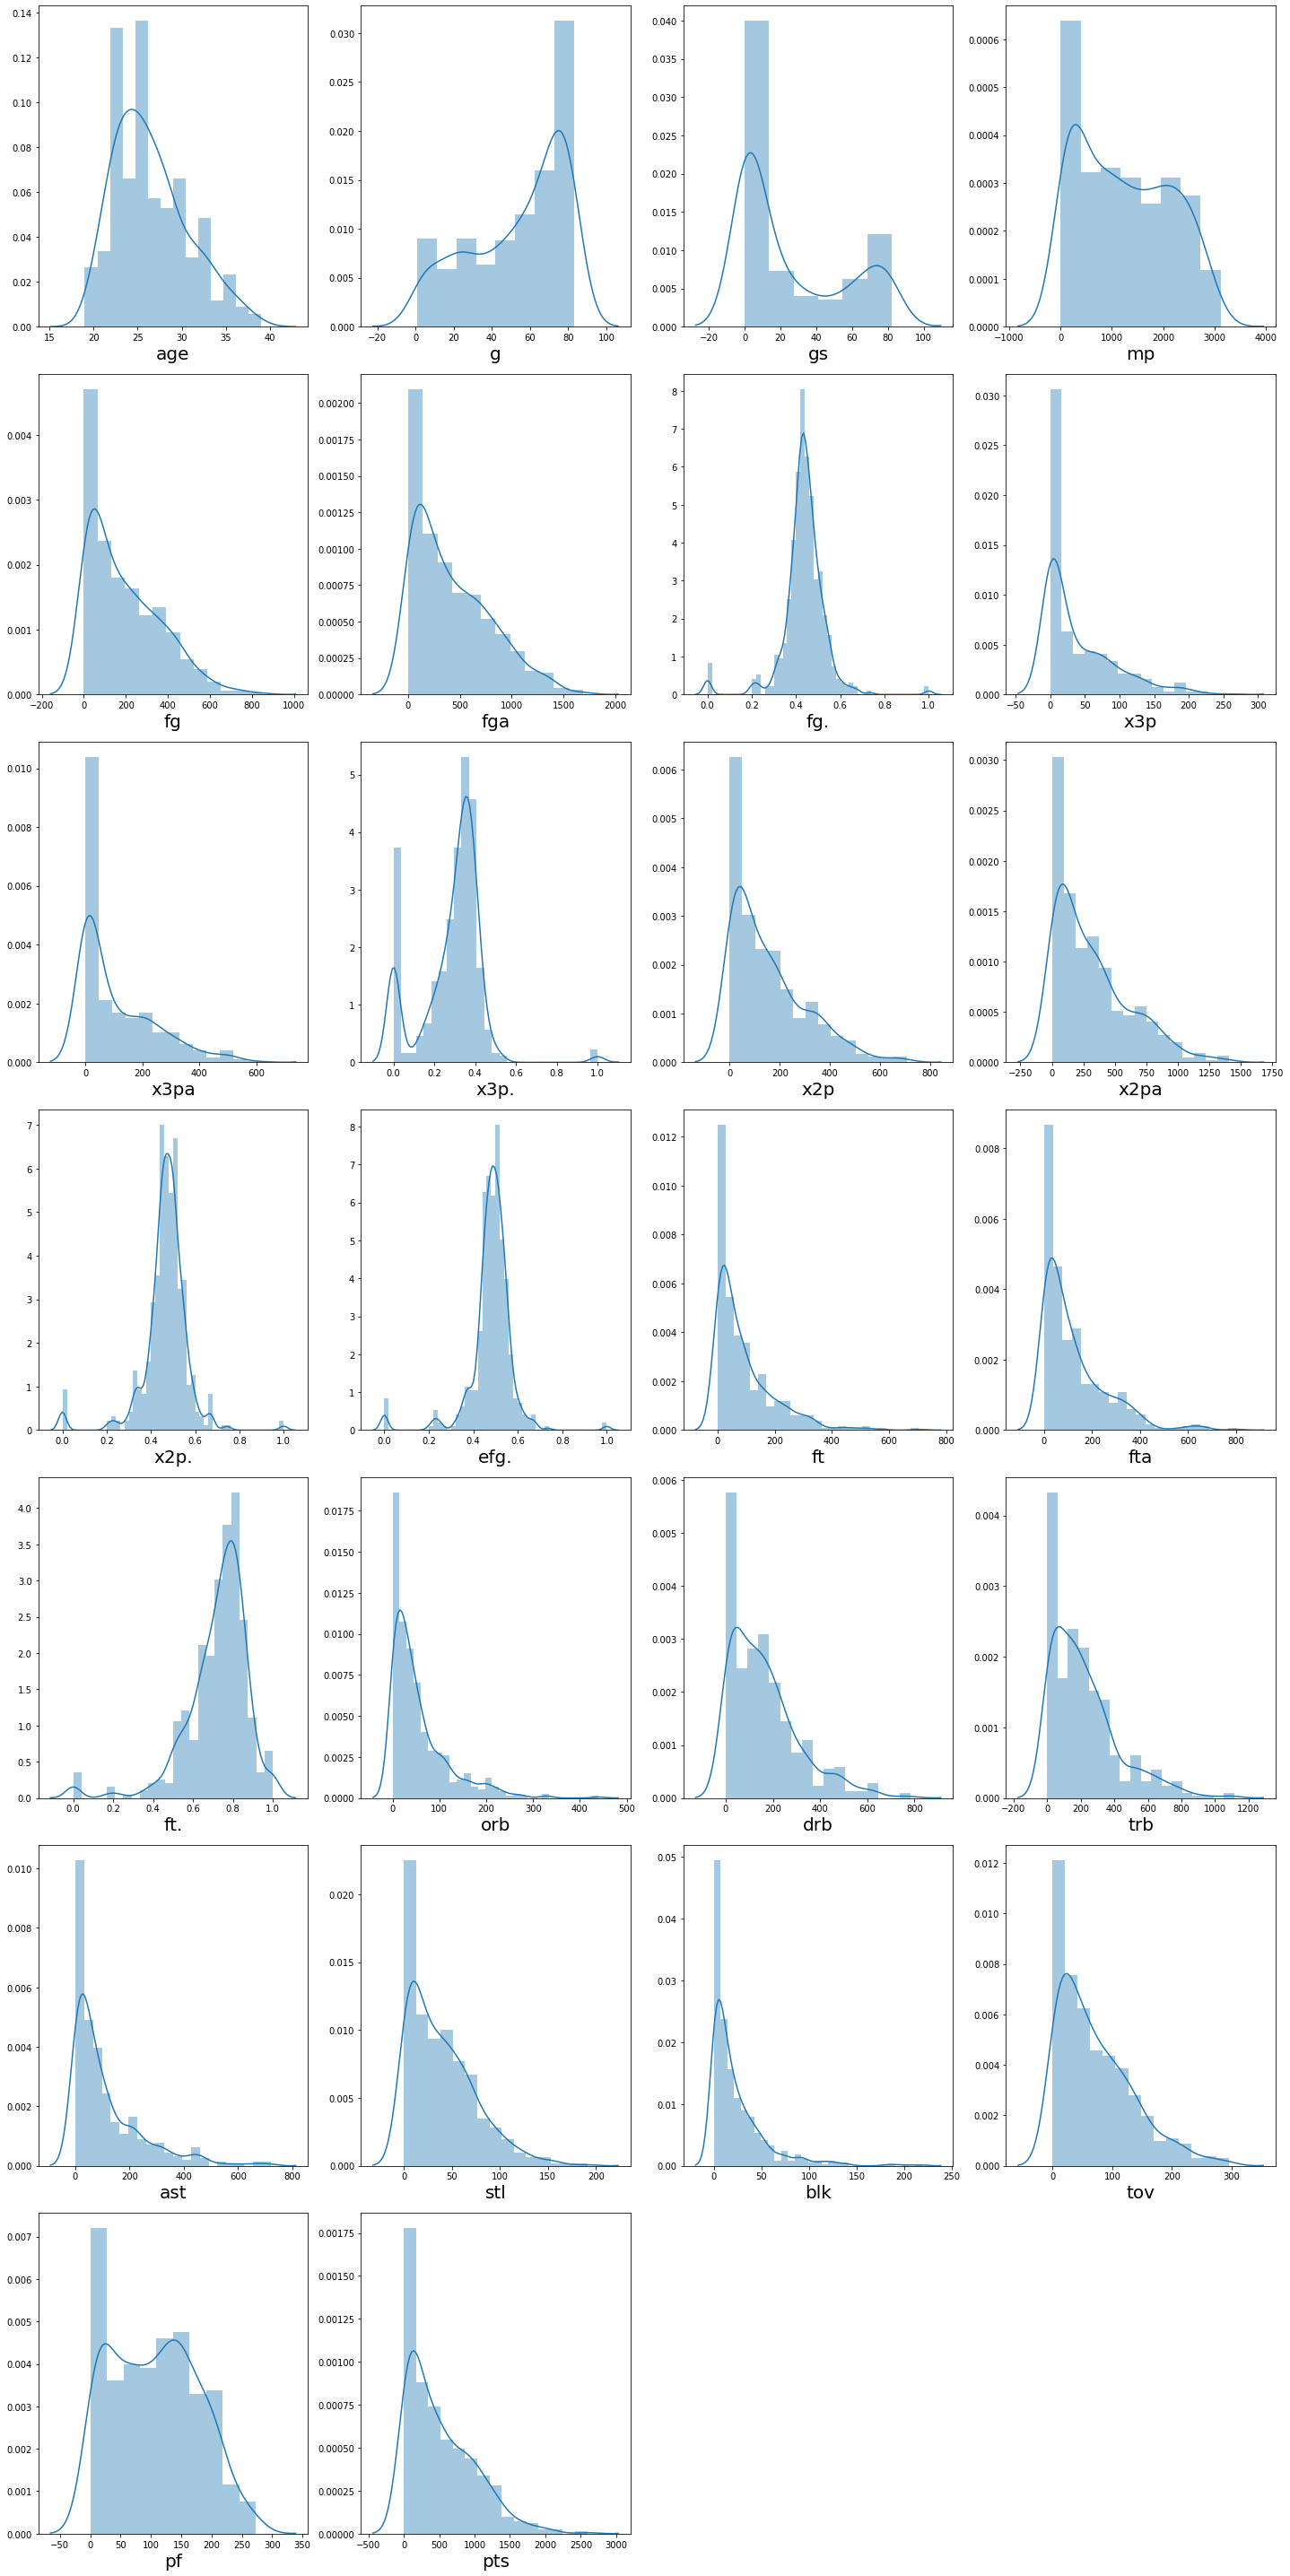

In [14]:
plt.figure(figsize=(20,40), facecolor='white')
plotnumber = 1

for column in nba_n[num_col]:
    if plotnumber<=26 :
        ax = plt.subplot(7,4,plotnumber)
        sns.distplot(nba_n[column])
        plt.xlabel(column,fontsize=20)
        plotnumber+=1
plt.tight_layout()

In [15]:
nba_n.describe(include='object')

,pos
count,478
unique,7
top,SG
freq,108


In [17]:
pos_dumm = pd.get_dummies(nba_n['pos'],prefix='pos')
pos_dumm

,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,0,0,0,0,0,1,0
1,1,0,0,0,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...
473,0,0,0,0,0,0,1
474,0,0,0,0,0,0,1
475,0,0,0,1,0,0,0
476,1,0,0,0,0,0,0


In [18]:
scaler =StandardScaler()
X = nba_n.drop(['pos','pts'],axis=1)
X_scaled = scaler.fit_transform(X)
X_scaled.shape

(478, 25)

In [19]:
df1 = pd.DataFrame(X_scaled,columns=X.columns)
df1.head(3)

,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf
0,-0.832150,0.376412,-0.867840,-0.445185,-0.746789,-0.777289,0.321371,-0.704858,-0.721724,-0.132478,-0.627300,-0.647895,0.240720,0.018340,-0.547798,-0.521407,-0.397108,0.255167,-0.136649,-0.019934,-0.650641,-0.475881,0.056501,-0.676116,0.218314
1,-1.547560,1.094355,-0.193324,-0.053674,-0.589369,-0.657754,0.676235,-0.783491,-0.834717,0.595228,-0.416454,-0.447029,0.342689,0.230921,-0.123238,0.111356,-0.897996,1.382877,0.180396,0.559963,-0.536135,0.013738,1.060369,-0.020928,1.361185
2,0.121729,-0.022446,-0.463130,-0.317665,-0.297850,-0.413251,0.848597,-0.783491,-0.834717,0.858678,-0.076381,-0.140624,0.508470,0.403011,-0.152185,-0.018246,-0.530255,0.738471,0.276888,0.429986,-0.574303,-0.447080,0.380329,-0.532294,0.020781


In [20]:
nba_f = pd.concat([nba_n.pts,df1,pos_dumm],axis=1)
nba_f.shape

(478, 33)

In [22]:
nba_f

,pts,age,g,gs,mp,fg,fga,fg.,x3p,x3pa,x3p.,x2p,x2pa,x2p.,efg.,ft,fta,ft.,orb,drb,trb,ast,stl,blk,tov,pf,pos_C,pos_F,pos_G,pos_PF,pos_PG,pos_SF,pos_SG
0,171,-0.832150,0.376412,-0.867840,-0.445185,-0.746789,-0.777289,0.321371,-0.704858,-0.721724,-0.132478,-0.627300,-0.647895,0.240720,0.018340,-0.547798,-0.521407,-0.397108,0.255167,-0.136649,-0.019934,-0.650641,-0.475881,0.056501,-0.676116,0.218314,0,0,0,0,0,1,0
1,265,-1.547560,1.094355,-0.193324,-0.053674,-0.589369,-0.657754,0.676235,-0.783491,-0.834717,0.595228,-0.416454,-0.447029,0.342689,0.230921,-0.123238,0.111356,-0.897996,1.382877,0.180396,0.559963,-0.536135,0.013738,1.060369,-0.020928,1.361185,1,0,0,0,0,0,0
2,362,0.121729,-0.022446,-0.463130,-0.317665,-0.297850,-0.413251,0.848597,-0.783491,-0.834717,0.858678,-0.076381,-0.140624,0.508470,0.403011,-0.152185,-0.018246,-0.530255,0.738471,0.276888,0.429986,-0.574303,-0.447080,0.380329,-0.532294,0.020781,0,0,0,1,0,0,0
3,1330,0.360199,0.775269,1.594144,1.462033,1.573703,1.586240,0.230121,1.732760,1.425151,0.934863,1.236301,1.343737,0.053927,0.423256,1.758335,1.636087,0.585647,-0.389238,0.456087,0.210025,1.028782,-0.130268,-0.688305,1.177587,0.415847,0,0,0,0,0,0,1
4,328,-0.355210,0.097211,0.143934,-0.328851,-0.338662,-0.483885,1.112210,-0.783491,-0.827184,-1.911379,-0.123992,-0.232546,0.780538,0.666206,-0.345167,-0.414676,0.718794,0.609590,0.132150,0.285012,-0.559036,-0.475881,0.704157,-0.148770,1.135433,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
473,939,-1.547560,0.735383,-0.328227,0.581692,0.879888,1.034750,-0.094326,0.002838,0.581467,-0.492043,1.025456,1.033928,0.239493,-0.285348,1.131144,1.559850,-0.517575,0.206837,-0.033265,0.040056,0.792136,1.108179,-0.267328,2.104438,0.627490,0,0,0,0,0,0,1
474,1144,0.360199,0.416297,-0.564307,0.632029,1.124764,1.254803,-0.013215,1.870368,1.801795,0.661674,0.664978,0.758163,0.005610,0.311904,1.382021,1.247281,0.649050,-0.437569,-0.184895,-0.269889,-0.139180,0.186544,-0.396859,0.362597,0.698038,0,0,0,0,0,0,1
475,1417,-0.355210,1.014584,1.762773,1.647721,2.261688,2.325182,0.179426,0.985748,1.364888,0.144714,2.297330,2.296996,0.282936,0.089200,0.687286,0.820356,-0.067410,1.769520,1.007468,1.279834,0.524955,3.671475,0.380329,1.481210,1.502280,0,0,0,1,0,0,0
476,490,-1.309090,1.134241,-0.766662,0.191300,-0.128769,-0.062797,-0.104465,-0.783491,-0.827184,-1.911379,0.120861,0.295151,-0.384789,-0.548543,0.523251,0.599270,0.046717,0.996233,0.490548,0.664944,-0.162081,0.013738,0.542243,0.234755,0.895571,1,0,0,0,0,0,0


In [30]:
X = nba_n.drop(['pts','pos'],axis = 1)
y = nba_n.pts
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size = 0.25,random_state=355)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(358, 25)
(120, 25)
(358,)
(120,)


In [31]:
from sklearn.neighbors import KNeighborsRegressor

In [32]:
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [33]:
y_train_pred = knn.predict(x_train)
y_test_pred = knn.predict(x_test)
print(knn.score(x_train,y_train))
print(knn.score(x_test,y_test))

0.9822744022788861
0.9766496457749932


# Assignemnt 2
In this assignment students have to find the frequency of words in a 
webpage. User can use urllib and BeautifulSoup to extract text from 
webpage

In [42]:
from bs4 import BeautifulSoup 
import urllib.request 
import nltk 
from nltk.corpus import stopwords 

In [43]:
from bs4 import BeautifulSoup
import urllib.request
import nltk
response = urllib.request.urlopen('http://php.net/')
html = response.read()
soup = BeautifulSoup(html,"html5lib")

In [66]:
text = soup.get_text(strip=True) 
tokens = [t for t in text.split()] 
clean_tokens = tokens[:] 
sr = stopwords.words('english') 
for token in tokens: 
    if token in stopwords.words('english'): 
        clean_tokens.remove(token) 
freq = nltk.FreqDist(clean_tokens)
for key,val in freq.items(): 
    print (str(key) + ':' + str(val))

PHP::1
Hypertext:1
PreprocessorDownloadsDocumentationGet:1
InvolvedHelpGetting:1
StartedIntroductionA:1
simple:1
tutorialLanguage:1
ReferenceBasic:1
syntaxTypesVariablesConstantsExpressionsOperatorsControl:1
StructuresFunctionsClasses:1
ObjectsNamespacesErrorsExceptionsGeneratorsReferences:1
ExplainedPredefined:1
VariablesPredefined:1
ExceptionsPredefined:1
Interfaces:1
ClassesContext:1
options:1
parametersSupported:1
Protocols:1
WrappersSecurityIntroductionGeneral:1
considerationsInstalled:1
CGI:1
binaryInstalled:1
Apache:1
moduleSession:1
SecurityFilesystem:1
SecurityDatabase:1
SecurityError:1
ReportingUsing:1
Register:1
GlobalsUser:1
Submitted:1
DataMagic:1
QuotesHiding:1
PHPKeeping:1
CurrentFeaturesHTTP:1
authentication:1
PHPCookiesSessionsDealing:1
XFormsHandling:1
file:1
uploadsUsing:1
remote:1
filesConnection:1
handlingPersistent:1
Database:1
ConnectionsSafe:1
ModeCommand:1
line:1
usageGarbage:1
CollectionDTrace:1
Dynamic:1
TracingFunction:1
ReferenceAffecting:1
PHP's:1
Behaviou

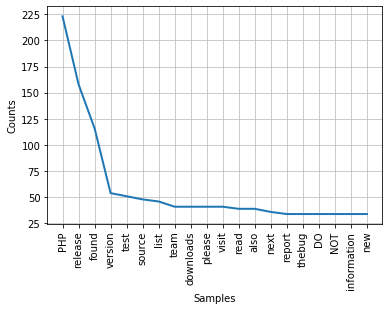

In [67]:
freq.plot(20,cumulative=False)

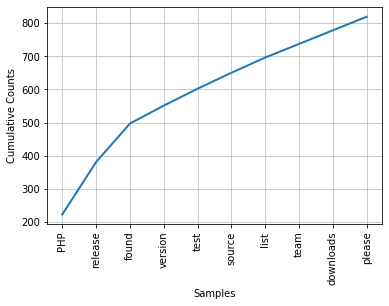

In [69]:
freq.plot(10, cumulative=True)

# Assignment 3
In this assignment students have to compress racoon grey scale image into 
5 clusters. In the end, visualize both raw and compressed image and look 
for quality difference.

In [25]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import scipy.misc
import matplotlib.pyplot as plt

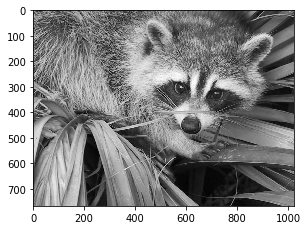

In [26]:
f = scipy.misc.face(gray=True)
plt.figure(figsize=(10, 3.6))
plt.imshow(f, cmap=plt.cm.gray)
plt.show()

In [27]:
rows = f.shape[0]
cols = f.shape[1]
f.shape

(768, 1024)

In [28]:
image = f.reshape(rows*cols,1)
kmeans = KMeans(n_clusters = 5)
kmeans.fit(image)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [29]:
clusters = np.asarray(kmeans.cluster_centers_) 
labels = np.asarray(kmeans.labels_)  
labels = labels.reshape(rows,cols)

Original Image


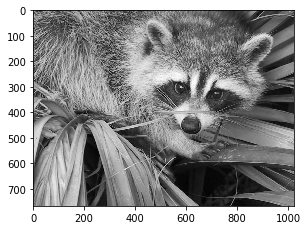


Compressed Image


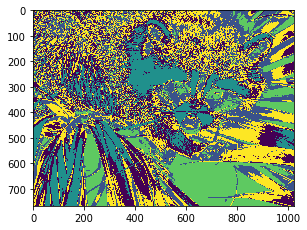

In [30]:
print('Original Image')
plt.figure(figsize=(10, 3.6))
plt.imshow(f, cmap=plt.cm.gray)
plt.show()

print()
print('Compressed Image')
image = plt.imread('compressed_racoon.png')
plt.figure(figsize=(10, 3.6))
plt.imshow(image)
plt.show()

# Assignment 4
In this assignment students have to transform iris data into 3 dimensions 
and plot a 3d chart with transformed dimensions and colour each data 
point with specific class.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

In [32]:
# import iris data 
iris = datasets.load_iris()
iris.data[1:5]    # 1st 5 records for features

array([[4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [35]:
y = iris.target
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

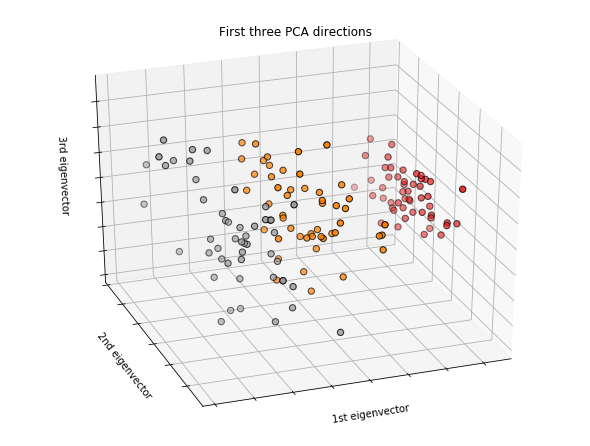

In [36]:
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

# Assignment 5
In this assignment students have to make ARIMA model over shampoo sales 
data and check the MSE between predicted and actual value.

In [2]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [3]:
def parser(x):
    return datetime.strptime('190'+x, '%Y-%m')
series = pd.read_csv('shampoo-sales.csv', header=0, parse_dates=True, index_col='Month')
series.head()

,Sales of shampoo over a three year period
Month,
1-01,266.0
1-02,145.9
1-03,183.1
1-04,119.3
1-05,180.3


In [17]:
series.isna().sum()

Sales of shampoo over a three year period    1
dtype: int64

In [18]:
series = series.dropna(axis=0)

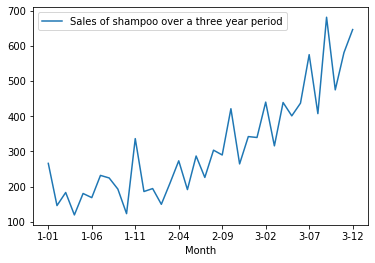

In [19]:
series.plot()
pyplot.show()

In [20]:
X = series.values
X[:5]

array([[266. ],
       [145.9],
       [183.1],
       [119.3],
       [180.3]])

In [21]:
size = int(len(X) * 0.60)
print(len(X))
print(size)

36
21


In [22]:
train, test = X[0:size], X[size:len(X)]

In [23]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
    print('predicted=%f, expected=%f' % (yhat, obs))
error = mean_squared_error(test, predictions)
print('Test MSE: %.3f' % error)

predicted=272.964481, expected=421.600000
predicted=290.313952, expected=264.500000
predicted=349.117692, expected=342.300000
predicted=306.512866, expected=339.700000
predicted=387.376465, expected=440.400000
predicted=348.154144, expected=315.900000
predicted=386.308801, expected=439.300000
predicted=356.082088, expected=401.300000
predicted=446.379471, expected=437.400000
predicted=394.737288, expected=575.500000
predicted=434.915413, expected=407.600000
predicted=507.923472, expected=682.000000
predicted=435.482761, expected=475.300000
predicted=652.743901, expected=581.300000
predicted=546.343472, expected=646.900000
Test MSE: 7547.808


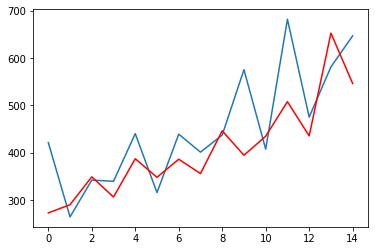

In [24]:
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()